# Segundo Entregable del Reto

Ana Paula Katsuda, A01025303

Octubre 2020

# Introducción

Existen diversos factores a tomar en cuenta al modelar el movimiento de los proyectiles balísticos expulsados por un volcán. Uno de estos factores es la resistencia al aire. Con el fin de comprender su impacto, es posible comparar la trayectoria de un proyectil balístico sin considerar la resistencia al aire con la trayectoria del mismo proyectil, considerando la resistencia al aire. El objetivo del presente escrito es lograr hacer la comparación mencionada anteriormente para modelar los proyectiles balísticos del Popocatépetl con mayor precisión.

# Marco Teórico

Resulta elemental obtener datos reales para obtener un modelo que describa el comportamiento de una explosión del Popocatépetl. Dichos datos fueron obtenidos mediante investigaciones académicas y son los siguientes:

# Datos para el Popocatépetl

Los datos encontrados relevantes son los siguientes:

**Velocidad inicial de proyectiles** 180 - 230 $\frac{m}{s}$ 

**Ángulos de disparo** 30º - 90º

**Altura inicial** 5452 $m$ respecto al nivel del mar

**Densidad de proyectiles** 2100 - 2600 $\frac{kg}{m^3}$

**Diámetro de proyectiles** 0.20 - 0.60 $m$

**Densidad del aire a nivel del mar** 1.3 $\frac{kg}{m^3}$

**Coeficiente de arrastre** 0.6 - 1.0

**Altura promedio de la ciudad de Puebla** 2137 $m$ respecto al nivel del mar

Cabe recalcar que los datos obtenidos son los que tienen mayor relevancia en términos de este escrito ya que permiten cumplir con el objetivo del mismo. Si bien los datos presentados anteriormente son relevantes, ciertos datos son de uso indirecto. En el caso de la densidad de los proyectiles y su diámetro, fueron utilizados para calcular su masa. Por otro lado, es necesario ajustar la altura inicial del proyectil puesto a que los datos obtenidos fueron respecto al nivel del mar y se quiere analizar el impacto en Puebla, que se encuentra a 2137 m sobre el nivel del mar. Por último, un dato adicional encontrado, fue la densidad del aire de 0.94 $\frac{kg}{m^3}$, reportada por Becerra.

# Metodología

A partir de lo discutido en clase, fue posible obtener relaciones matemáticas que lograran modelar el movimiento de los balísticos del Popocatépetl. Las relaciones obtenidas fueron las siguientes:

**Trayectoria de Proyectil sin considerar resistencia al aire**

$\vec{r}(t) = v_{ox}(t)\vec{i} + (\frac{1}{2}gt^2 + v_{oy}t + s_{oy})\vec{j}$

Conociendo las aceleraciones (en este caso constantes) de los componentes $x$ y $y$, se integraron las mismas para obtener la velocidad, y posteriormente para obtener la posición de cada componente. En este caso, la aceleración del componente $x$ fue de 0 ya que la velocidad es constante, mientras que la aceleración del componente $y$ fue de $-9.81 \frac{m}{s^2}$ debido a la fuerza ejercida por la gravedad. 

Asimismo, fue necesario tomar en cuenta la resistencia al aire, por lo que se requirieron las siguientes relaciones:

**Resistencia al aire**

$\vec{F_D} = -Dv\vec{v}$

Lo anterior, sabiendo que la resistencia al aire ejerce una fuerza opuesta al movimiento.

**Constante D**

$D = \frac{CA\rho}{2}$

Donde $C$ es el coefficiente de arrastre, $A$ es el área frontal del proyectil y $\rho$ es la densidad del aire.

**Aceleración a partir de la segunda ley de Newton**

Esta se divide en los componentes puesto a que, para el componente $x$, solo se toma en cuenta la resistencia al aire mientras que para el componente $y$, se toma en cuenta la fuerza de la gravedad adicional a la resistencia al aire. 

$a_x = -\frac{D}{m}vv_x$

$a_y = -g-\frac{D}{m}vv_y$

**Posición considerando resistencia al aire**

Puesto a que la aceleración no es constante, es necesario encontrar los valores de posición, velocidad y aceleración en distintos puntos del tiempo. 

$\vec{s}(t + \Delta t) = \vec{s}(t) + \vec{v}(t)\Delta t + \frac{1}{2}\vec{a}(t)(\Delta t)^2$

**Expresión de Velocidad**

$\vec{v}(t + \Delta t) = v_x + \vec{a}_x\Delta t$

Las dos expresiones anteriores se deben separar en componentes.

**Expresión de masa**

$masa = densidad*volumen$

# Resultados

In [1]:
import numpy as np
import matplotlib.pyplot as plt

**Valores iniciales sin resistencia al aire**

In [2]:
# Velocidad Inicial
v_0 = 240

# Ángulo en grados
theta_deg = 60

# Altura inicial
y_0 = 3315

# Vector de tiempo
t = np.linspace(0,60, num = 45)

In [4]:
print(v_0)

240


Los valores iniciales a considerar fueron extraídos de los datos presentados anteriormente. Puesto a que dichos datos incluían rangos, se eligieron valores entre dichos rangos para la simulación del proyectil. 

**Cálculo de trayectoria sin resistencia al aire**

In [4]:
def proyectile_no_drag(v_0, theta_degree, y_0, t, g = 9.81):
    
    # Ángulo en radianes
    theta_rad = np.radians(theta_degree)
    
    # Componentes de velocidad inicial
    v_0x = v_0*np.cos(theta_rad)
    v_0y = v_0*np.sin(theta_rad)
    
    # Posiciones de x y y en cada paso t
    r_x = v_0x*t
    r_y = -4.9*t**2 + v_0y*t + y_0
    
    return r_x, r_y

La función del cálculo de la trayectoria sin resistencia al aire considera la velocidad inicial y sus componentes. 

In [5]:
r_x, r_y = proyectile_no_drag(v_0, theta_deg, y_0,t)

**Datos considerando resistencia al aire**

In [21]:
# Masa en kg
m = 1000
# Densidad del Aire
rho = 0.9
# Coeficiente de arrastre
C = 0.8
# Radio de la pelota
r = .2
# Área de la pelota
A = np.pi*r**2
# Delta t
dt = 0.1
# Iteraciones
N = 100000

Los datos considerando la resistencia al aire muestran la masa, que se calculó tomando el promedio de densidad y de diámetro de los balísticos, la densidad del aire reportada por Becerra (que en este caso puede ser relacionada con la densidad del aire después de la primera explosión), y el coeficiente de arrastre dentro de los rangos típicos. Asimismo, se determinó un cambio en el tiempo de 0.1 segundos para determinar la posición, velocidad y aceleración en cada tiempo.

**Coeficiente D**

In [22]:
D = (rho*C*A)/2

**Cálculos trayectoria del proyectil con resistencia al aire**

In [23]:
def proyectile_with_drag(v_0, theta_deg, y_0, m, D, dt, N, g=9.81):
    
    # Ángulo en radianes
    theta_rad = np.radians(theta_deg)
    
    # Componentes de velocidad inicial
    v_0x = v_0*np.cos(theta_rad)
    v_0y = v_0*np.sin(theta_rad)
    
    # Tiempo
    t = 0
    t_list = [t]

    # Velocidad
    v = v_0
    v_x = v_0x
    v_y = v_0y

    v_list = [v]
    v_x_list = [v_0x]
    v_y_list = [v_0y]

    # Posición
    x = 0
    y = y_0

    x_list = [x]
    y_list = [y]

    # Aceleración inicial
    a_x = -(D/m)*v*v_x
    a_y = -g-(D/m)*v*v_y

    a_x_list = [a_x]
    a_y_list = [a_y]
    
    for i in range(N):
            
        # Velocidades para 'x' y 'y' del siguiente paso
        v_x_next = v_x + (a_x) * dt
        v_y_next = v_y + (a_y) * dt
        
        # Magnitud del vector de velocidad con componentes v_x_next y v_y_next
        v_next = np.sqrt((v_x_next)**2 + (v_y_next)**2)

        # Agregar valores a listas v_list, v_x_list, v_y_list. 
        v_list.append(v_next)
        v_x_list.append(v_x_next)
        v_y_list.append(v_y_next)

        # Posiciones 'x' y 'y' del siguiente paso
        x_next = x + v_x_next * dt + (1/2)* a_x*(dt**2)
        y_next = y + v_y_next * dt + (1/2)*a_y*(dt**2)
        
        # Agregar calores a listas x_list y y_list
        x_list.append(x_next)
        y_list.append(y_next)
        
        # Aceleraciones para 'x' y 'y' del siguiente paso
        a_x_next = -(D/m)*v*v_x_next
        a_y_next = -g-(D/m)*v*v_y_next

        # Agregar valores a listas a_x_list y a_y_list
        a_x_list.append(a_x_next)
        a_y_list.append(a_y_next)
        
        v_x = v_x_next
        v_y = v_y_next
        v = v_next

        x = x_next
        y = y_next

        a_x = a_x_next
        a_y = a_y_next

        # Calcular tiempo y guardarlo en una lista t_list
        t += dt
        t_list.append(t)
        
    return x_list, y_list, v_list, v_x_list, v_y_list, a_x_list, a_y_list, t_list

In [24]:
[x_list, y_list, v_list, v_x_list, 
 v_y_list, a_x_list, a_y_list, t_list] = proyectile_with_drag(v_0, theta_deg, y_0, m, D, dt, N)

# Gráficos

Proyectil tomando en cuenta resistencia al aire y mismo proyectil sin tomar en cuenta la misma. 

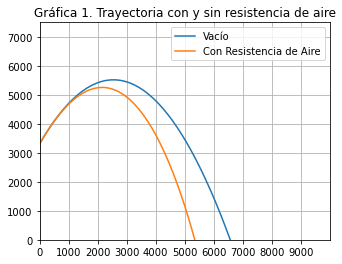

In [25]:
# Hacer una figura con dimensiones de (15 x 4) pixeles.
fig = plt.figure(figsize=(15,4))

# Hacer el gráfico
plt.plot(r_x,r_y, label="Vacío")
plt.plot(x_list,y_list, label="Con Resistencia de Aire")

# Poner una cuadrícula
plt.grid()

# Hacer que los ejes tengan la misma proporción
plt.axis('scaled')

# Poner el título del gráfico
plt.title("Gráfica 1. Trayectoria con y sin resistencia de aire")

# Definir el rango del eje x
plt.xlim([0, 10000])
# Definir el rango del eje y
plt.ylim([0,7500])

# Definir la ubicación de los ticks del eje x
_ = plt.xticks(np.arange(0,10000,1000))
# Definir la ubicación de los ticks del eje y
_ = plt.yticks(np.arange(0,7500,1000))

# Poner una leyenda para identificar a qué simulación corresponde cada línea
_ = plt.legend()

El gráfico anterior muestra las dos trayectorias de un proyectil al tomar en cuenta la resistencia al aire (naranja) y al no tomarla en cuenta (azul). Es posible observar una diferencia significativa tanto en el alcance del proyectil como en su altura máxima. Cabe mencionar que en este caso, el valor de la densidad del aire es elevado; en caso de tomar en cuenta el valor de la densidad del aire a nivel del mar, la diferencia entre los dos gráficos sería menos significativa. 

**Otros gráficos**

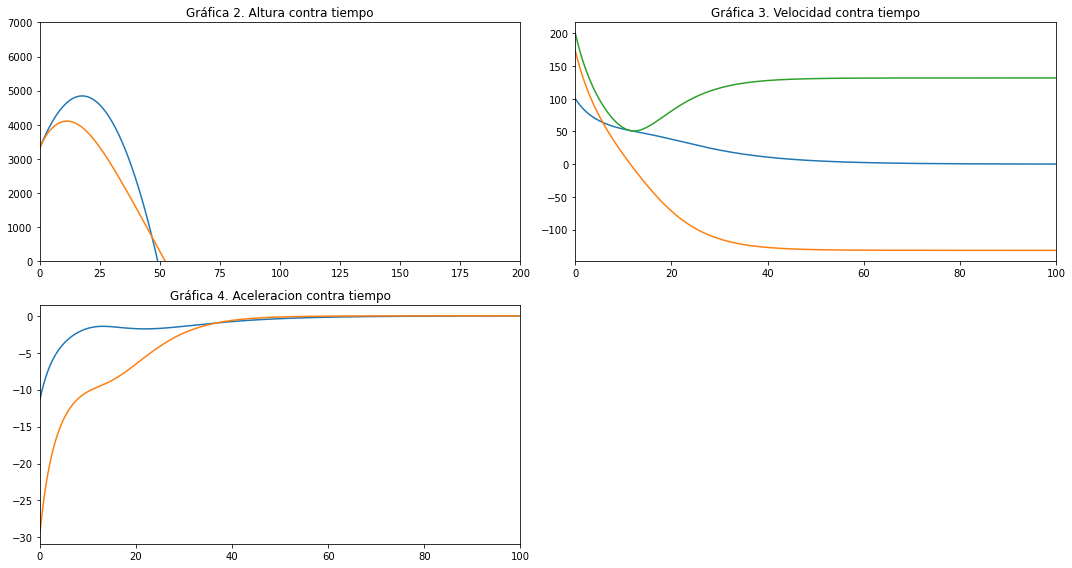

In [15]:
fig = plt.figure(figsize = (15,8))

plt.subplot(2,2,1)

plt.plot(t,r_y,label="Vacio")
plt.plot(t_list,y_list,label="Con Resistencia de Aire")
plt.title("Gráfica 2. Altura contra tiempo")
plt.xlim([0,200])
_ = plt.ylim([0, 7000])

plt.subplot(2,2,2)

plt.plot(t_list,v_x_list,label="v_x")
plt.plot(t_list,v_y_list,label="v_y")
plt.plot(t_list,v_list,label="v")
plt.title("Gráfica 3. Velocidad contra tiempo")
plt.xlim([0,100])

plt.subplot(2,2,3)

plt.plot(t_list,a_x_list,label="a_x")
plt.plot(t_list,a_y_list,label="a_y")
plt.title("Gráfica 4. Aceleracion contra tiempo")
plt.xlim([0,100])
plt.tight_layout()

Los gráficos anteriores muestran la relación de altura y tiempo (componente $y$ en tiempo), velocidad y tiempo (tanto magnitud de la velocidad inicial indicada en color verde como velocidad inicial en los componentes $x$ y $y$), la aceleración y tiempo (aceleración en ambos componentes).

# Análisis de Gráficos

La Gráfica 1 proporciona una visualización del efecto que podría llegar a tener la resistencia al aire en una trayectoria. Sabiendo que la resistencia al aire es una fuerza que se opone al movimiento, incluso es posible analizar de qué manera está influenciando en distintos momentos del tiempo. Inicialmente, la resistencia al aire actúa en una dirección negativa respecto al eje $x$ y $y$, lo que implica que tanto la gravedad como la resistencia al aire aceleran al proyectil hacia abajo. Después del punto máximo, la resistencia al aire se opone a la fuerza de la gravedad por lo que el proyectil acelera menos en el eje $y$. La Gráfica 4 muestra lo anterior: la línea naranja muestra la aceleración en el eje y, es posible ver la pendiente más definida aparece durante los primeros segundos y al llegar al punto máximo, se vuelve menos definida y, posteriormente tanto la aceleración en $x$ como la aceleración en $y$ tienden a 0. 

En cuanto al la Gráfica 2, es posible observar que el proyectil tarda menos en llegar a su punto máximo debido a la resistencia al aire tanto en el eje $x$ como en el eje $y$, por otro lado el proyectil con resistencia al aire tarda más en llegar al piso dado que la resistencia al aire se opone a la fuerza de gravedad. 

La Gráfica 3 muestra las velocidades en los componentes y la magnitud de la velocidad. La línea azul describe la velocidad en el componente $x$ que tiene una tasa de decrecimiento menor a la velocidad en el componente $y$, esto es debido a que la única fuerza aplicada en el componente $x$ es la de la resistencia al aire mientras que las fuerzas impactando al componente $y$ son la de la resistencia al aire y la de la gravedad. Posteriormente, llega un momento en el que la velocidad en ambos componentes y la magnitud de la velocidad se vuelven constantes, esto sustenta que la aceleración tienda a cero en la Gráfica 4.

En términos numéricos, es posible encontrar la altura máxima y el alcance del proyectil con resistencia al aire y sin resistencia. 

Para la trayectoria con resistencia al aire, es posible buscar en las listas obtenidas en el procedimiento. Los valores encontrados son los siguientes:

In [17]:
# Altura Máxima
yd_max = max(y_list)
yd_max

4105.638291095949

In [19]:
# Alcance Máximo
xd_max = max(x_list)
xd_max

1740.753585182194

Asimismo, es posible encontrar los valores de altura máxima y alcance máximo para la trayectoria sin resistencia al aire mediante el uso de derivadas y de la relación de posición. 

Para la altura máxima, es necesario encontrar el tiempo en el que la velocidad en el componente $y$ equivale a cero de la siguiente manera: 

$ 0 = gt + v_{oy}$

A partir de lo anterior, es posible comprobar que el tiempo que tarda es de 17.7 segundos y, eso posteriormente se sustituye en la relación de desplazamiento en el componente $y$ y resulta en 4845.6 metros como altura máxima. 

Asimismo, el tiempo para el alcance máximo se logra obtener de la siguiente manera:

$ 0 = \frac{1}{2}gt^2 + v_{oy}t + s_{oy}$

$ s_x = v_{ox}t$

A partir de lo anterior se determina que el tiempo en llegar al piso es de 49 segundos y se sustituye en la relación para el desplazamiento en el componente $x$ es de 4900 metros.

# Conclusión

El objetivo del escrito fue alcanzado: fue posible modelar la trayectoria de un proyectil en dos situaciones, una sin incluir resistencia al aire, y la otra, incluyéndolo. Asimismo, fue posible entender la diferencia en la trayectoria dadas las dos situaciones. 

El análisis del caso estudiado, evidenció que la trayectoria sin tomar en cuenta la resistencia al aire tiene mayor alcance y una altura máxima mayor. Lo anterior dado que existen menos fuerzas actuando sobre el objeto por lo que tiene mayor facilidad para llegar al piso. De manera numérica, la altura máxima del proyectil sin resistencia al aire fue de 4845.6 metros y el alcance máximo fue de 4900. Por otro lado, la altura máxima del proyectil con resistencia al aire fue de 4105.6 metros y su alcance máximo fue de 1740 metros. Esto supone una diferencia de 740 metros de altura máxima y 3160 metros de alcance máximo respectivamente. Cabe recalcar, que la altura máxima está en relación a la altura de la ciudad de Puebla. Asimismo, cabe mencionar que solo se analizó una situación. 

En cuanto a las limitaciones del presente escrito, una de gran importancia es el tomar al proyectil como una esfera perfecta, que no es el caso del fenómeno. Asimismo, la situación analizada, no implica la situación en la que el proyectil tiene su mayor alcance, por lo que los valores utilizados no deben ser tomados en cuenta si se va a hacer una evaluación de riesgo. 

# Referencias

Alatorre, M. (2011). A model of volcanic explosions at Popocatépetl volcano (Mexico)... [Sitio Web]. Recuperado de: https://d-nb.info/1015203132/34

Becerra, L., Guardado, M. (2001). Estimación de la incertidumbre en la determinación de la densidad del aire. CENAM. [Sitio Web]. Recuperado de: http://www.cenam.mx/myd/DENSIDAD%20DEL%20AIRE%20abril-20031.pdf

Bucheli, E. Modelación Computacional del Movimiento. Tecnológico de Monterrey, Ciudad de México. 7 oct. 2020

INEGI (2017). Anuario estadístico y geográfico de Puebla 2017. [Sitio Web]. Recuperado de: 
https://www.datatur.sectur.gob.mx/ITxEF_Docs/PUE_ANUARIO_PDF.pdf

Pacheco, J. (2008) Análisis y Comparación de las emisiones… UNAM. [Sitio Web]. Recuperado de: http://www.ptolomeo.unam.mx:8080/xmlui/bitstream/handle/132.248.52.100/8070/Tesis_Completa.pdf?sequence=1	

Shiffman, D. (s.f.). Resistencia del aire y de fluidos. Khan Academy. [Sitio Web]. Recuperado de: https://es.khanacademy.org/computing/computer-programming/programming-natural-simulations/programming-forces/a/air-and-fluid-resistance								